In [2]:
# Using this location as a root Directory
import os
ROOT = "/content/drive/MyDrive/Colab Notebooks/Deep learning"
os.chdir(ROOT)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Checking all the avaliable files
os.listdir()

['logs',
 'model_ckp.h5',
 'model.h5',
 'ANN_with_callbacks.ipynb',
 'Handwritten Digit Classification.ipynb',
 'SAVED_MODELS',
 'project1',
 'project3',
 'APS_in_dl.ipynb']

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import os
import tensorflow as tf
import seaborn as sns


In [7]:
# loading the dataset
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

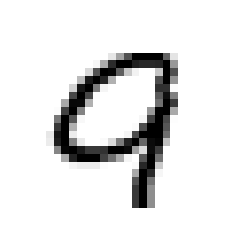

In [11]:
plt.imshow(X_train_full[3000],cmap="binary")
plt.axis("off")
plt.show()

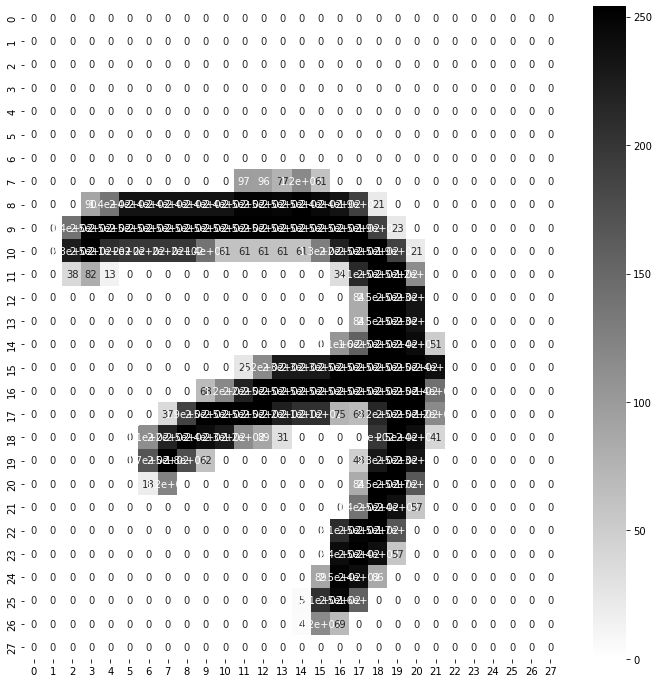

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(X_train_full[5000], annot=True, cmap="binary")
plt.show()

In [14]:
# splitting the dataset into training and validation part and normalizing them to 0 to 1
X_valid, X_train = X_train_full[: 5000] / 255., X_train_full[5000: ]/255.
y_valid, y_train = y_train_full[: 5000], y_train_full[5000:]

X_test = X_test/255.

In [15]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((55000, 28, 28), (5000, 28, 28), (55000,), (5000,))

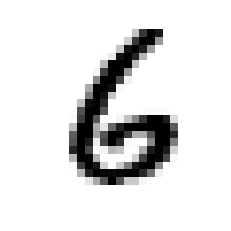

In [17]:
# Ploting the first data in X_train
plt.imshow(X_train[1000], cmap="binary")
plt.axis("off")
plt.show()

In [18]:
# Checking what its label
y_train[0]

7

In [19]:
# Creating the layers
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")
]

In [20]:
# Creating the model
model = tf.keras.models.Sequential(LAYERS)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "ADAM"
METRICS = ["accuracy"]

In [25]:
model.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZER, metrics=METRICS)

In [27]:
model.layers[1].name

'hiddenLayer1'

In [32]:
hidden1=model.layers[1]

In [33]:
weights, bias = hidden1.get_weights()

In [34]:
EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.2147 - accuracy: 0.9356 - val_loss: 0.1054 - val_accuracy: 0.9682
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.0756 - val_accuracy: 0.9782
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9813 - val_loss: 0.0813 - val_accuracy: 0.9772
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0444 - accuracy: 0.9850 - val_loss: 0.0770 - val_accuracy: 0.9802
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0337 - accuracy: 0.9888 - val_loss: 0.0771 - val_accuracy: 0.9798
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9909 - val_loss: 0.0751 - val_accuracy: 0.9780
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0231 - accuracy: 0.9921 - val_loss: 0.0863 - val_accuracy:

In [36]:
import time 
import os
def saveModel_path(model_dir="SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [37]:
model.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_01_22_11_21_05_.h5


In [38]:
history.params     

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [39]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.214726,0.935618,0.105381,0.9682
1,0.087622,0.972945,0.075636,0.9782
2,0.059092,0.981273,0.081255,0.9772
3,0.044396,0.985018,0.077009,0.9802
4,0.033663,0.988782,0.077092,0.9798
5,0.028034,0.990927,0.075100,0.9780
6,0.023098,0.992145,0.086346,0.9788
7,0.019907,0.993964,0.089181,0.9788
8,0.019104,0.993691,0.092918,0.9806
9,0.016656,0.994509,0.079004,0.9800


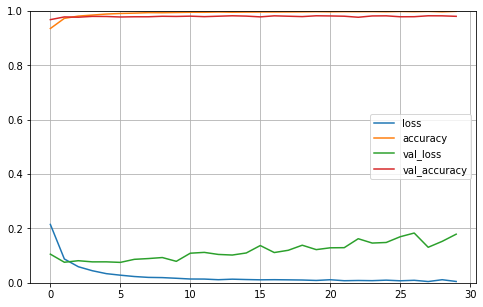

In [41]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [43]:
model.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.1658 - accuracy: 0.9796


0.9796000123023987

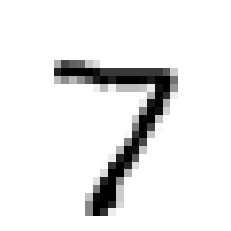

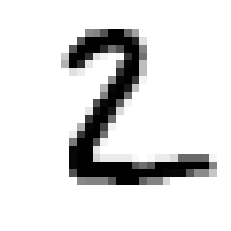

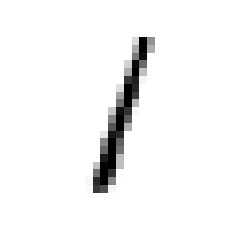

In [44]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()

In [47]:
prediction=model.predict(X_test[:3])

1/1 [==============================] - 0s 68ms/step


In [48]:
prediction

array([[7.2905157e-26, 5.1460843e-13, 1.0444000e-21, 1.6116166e-11,
        3.4871838e-18, 2.1823537e-21, 4.6079199e-34, 1.0000000e+00,
        1.1825949e-19, 3.1735111e-11],
       [1.1956529e-29, 1.7223204e-19, 1.0000000e+00, 7.1033229e-17,
        0.0000000e+00, 0.0000000e+00, 3.2587347e-38, 5.8457612e-37,
        8.1107370e-31, 0.0000000e+00],
       [1.2584650e-15, 1.0000000e+00, 3.2438973e-14, 4.9373759e-19,
        1.6877514e-08, 1.4580988e-13, 1.2341705e-16, 4.5225360e-12,
        3.0802011e-14, 5.9855977e-15]], dtype=float32)

In [49]:
y_prob=prediction[0]

In [50]:
np.argmax(y_prob.round(5))

7

In [51]:
y_prob=prediction[1]

In [52]:
np.argmax(y_prob)

2

In [55]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[7.29054340e-26, 5.14608430e-13, 1.04440004e-21, ...,
        1.00000000e+00, 1.18259492e-19, 3.17351111e-11],
       [1.19564364e-29, 1.72231385e-19, 1.00000000e+00, ...,
        5.84567237e-37, 8.11067498e-31, 0.00000000e+00],
       [1.25846501e-15, 1.00000000e+00, 3.24390342e-14, ...,
        4.52256158e-12, 3.08020685e-14, 5.98559771e-15],
       ...,
       [9.66167391e-35, 5.21356940e-29, 1.05576979e-33, ...,
        3.86384842e-26, 6.02930569e-28, 2.14094676e-14],
       [2.29741601e-34, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.66310147e-30, 4.81468619e-37],
       [1.49070694e-29, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 8.14131144e-36]], dtype=float32)

In [57]:
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/Colab Notebooks/Deep learning/SAVED_MODELS/Model_2023_01_22_07_05_05_.h5")

In [58]:

#tensorboard
import time

def get_log_path(log_dir="/content/logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")    
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at:\n{log_path}")
    return log_path

log_dir = get_log_path()

saving logs at:
/content/logs/fit/log_2023_01_22_11_50_32


In [59]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [63]:

# EPOCHS=5
# VALIDATION_SET=(X_valid,y_valid)
# history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,callbacks=[tensorboard_callback])

In [64]:

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [65]:
%reload_ext tensorboard


In [ ]:
%tensorboard --logdir logs/fit

Launching TensorBoard...